In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#!type resale_Lincoln_MKS.csv

In [4]:
# load dataset
df_Sierra = pd.read_csv('resale_GMC_Sierra.csv')
df_Sierra.head()

,brand,config,drivetrain,exterior_color,interior_color,mileage,model,price,transmission,year
0,GMC,1500 SLE,4x4/4-wheel drive,White,Black,54689,Sierra,NaN,Automatic,2014
1,GMC,1500 SLE,4x4/4-wheel drive,Brown,Black,78323,Sierra,23495.0,Automatic,2014
2,GMC,1500 SLT,4x4/4-wheel drive,Blue,Black,31007,Sierra,29900.0,Automatic,2015
3,GMC,1500 SLT,4x4/4-wheel drive,Black,Black,11582,Sierra,36000.0,Automatic,2017
4,GMC,1500 Base,4x4/4-wheel drive,Black,Black,76951,Sierra,24998.0,Automatic,2016


In [5]:
## clean the dataset
# drop rows that have NaN
df_Sierra = df_Sierra.dropna(axis=0, how='any')

config
1500 SLT       1640
1500 SLE       1311
1500 Denali     761
1500 Base       389
dtype: int64


Text(0.5, 1.0, 'GMC Sierra-Configuration Plot')

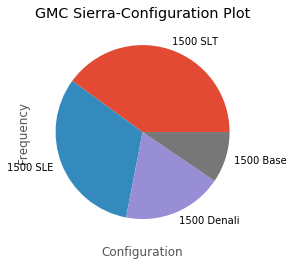

In [6]:
## Explore the dataset: Take care of the config: only care about Base and EcoBoost
df_Sierra = df_Sierra[df_Sierra['config'].isin(['1500 SLT', '1500 SLE', '1500 Denali', '1500 Base']) ]
group_config = df_Sierra.groupby('config')
print(group_config.size().sort_values(ascending = False))
df_Sierra['config'].value_counts().plot(kind='pie')
plt.xlabel('Configuration')
plt.ylabel('Frequency')
plt.title('GMC Sierra-Configuration Plot')

exterior_color
White     1267
Black     1169
Red        449
Gray       403
Silver     384
Blue       251
Brown      105
dtype: int64


Text(0.5, 1.0, 'GMC Sierra-Exterior Color')

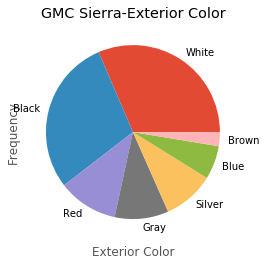

In [7]:
## Explore the dataset: Take care of the exterior_color: ['Black', 'White', 'Brown', 'Silver', 'Red', 'Gray', 'Beige', 'Other', 'Blue']
df_Sierra = df_Sierra[df_Sierra['exterior_color'].isin(['White', 'Gray', 'Black', 'Silver', 'Red', 'Blue', 'Brown'])]
group_ext_color = df_Sierra.groupby('exterior_color')
print(group_ext_color.size().sort_values(ascending = False))
df_Sierra['exterior_color'].value_counts().plot(kind='pie')
plt.xlabel('Exterior Color')
plt.ylabel('Frequency')
plt.title('GMC Sierra-Exterior Color')

interior_color
Black    2704
Gray      369
Brown     357
Beige     338
Other     255
dtype: int64


Text(0.5, 1.0, 'GMC Sierra-Interior Color')

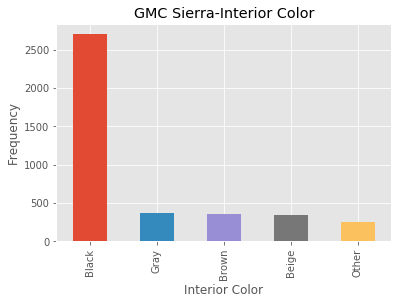

In [8]:
## Explore the dataset: Take care of the interior_color: []
df_Sierra = df_Sierra[df_Sierra['interior_color'].isin(['Black', 'Gray', 'Other', 'Beige', 'Brown'])]
group_int_color = df_Sierra.groupby('interior_color')
print(group_int_color.size().sort_values(ascending = False))
df_Sierra['interior_color'].value_counts().plot(kind='bar')
plt.xlabel('Interior Color')
plt.ylabel('Frequency')
plt.title('GMC Sierra-Interior Color')

drivetrain
4x4/4-wheel drive    3187
RWD                   788
dtype: int64


Text(0.5, 1.0, 'GMC Sierra-Drivetrain')

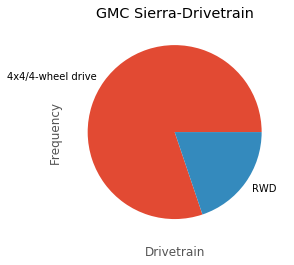

In [9]:
## Explore the dataset: Take care of the drivetrain:
df_Sierra = df_Sierra[df_Sierra['drivetrain'].isin(['4x4/4-wheel drive', 'RWD'])]
group_dt = df_Sierra.groupby('drivetrain')
print(group_dt.size().sort_values(ascending = False))
df_Sierra['drivetrain'].value_counts().plot(kind='pie')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.title('GMC Sierra-Drivetrain')

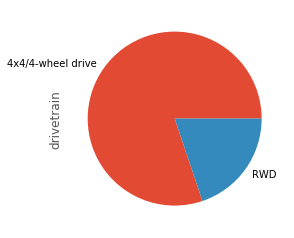

In [10]:
df_Sierra['drivetrain'].value_counts().plot(kind='pie')

year
2016    1072
2017     730
2018     701
2015     537
2014     357
2013     138
2011     134
2012     119
2019      63
2010      60
2009      26
2007      14
2008      12
2006       4
2004       3
2005       2
2003       1
2001       1
1999       1
dtype: int64


Text(0.5, 1.0, 'GMC Sierra-Year')

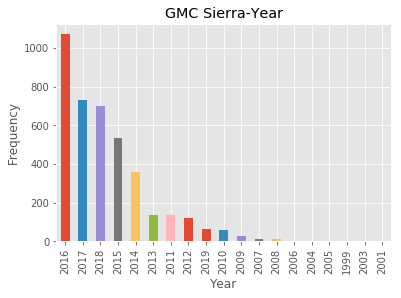

In [11]:
## Explore the dataset: Take care of the year:
group_yr = df_Sierra.groupby('year')
print(group_yr.size().sort_values(ascending = False))
df_Sierra['year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('GMC Sierra-Year')

Text(0.5, 1.0, 'GMC Sierra-Price vs Mileage')

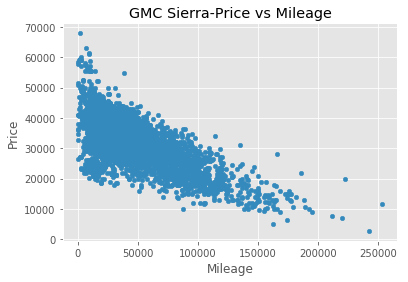

In [12]:
# scatter(x='Mileage', y='Price')
df_Sierra.plot(kind='scatter',x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('GMC Sierra-Price vs Mileage')

Text(0.5, 1.0, 'GMC Sierra-Price vs Year')

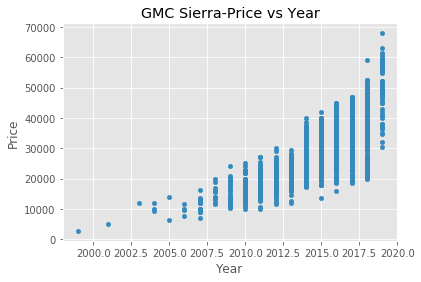

In [13]:
# scatter(x='Year', y='Price')
df_Sierra.plot(kind='scatter',x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('GMC Sierra-Price vs Year')

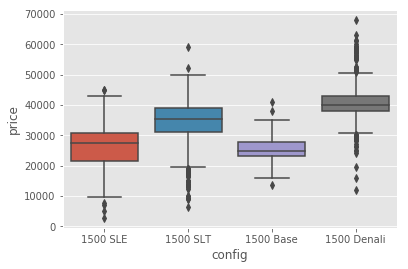

In [14]:
import seaborn as sns
# boxplot of price by config
sns.boxplot(x='config', y='price', data=df_Sierra)

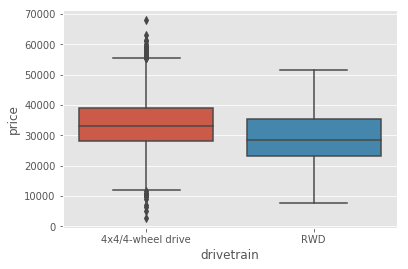

In [15]:
# boxplot of price by drivetrain
sns.boxplot(x='drivetrain', y='price', data=df_Sierra)

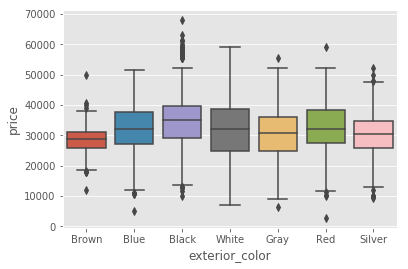

In [16]:
# boxplot of price by color
sns.boxplot(x='exterior_color', y='price', data=df_Sierra)

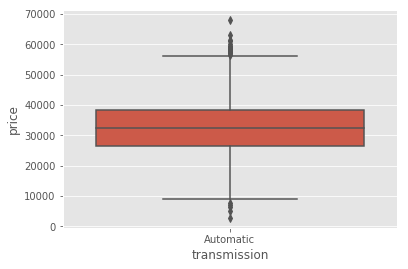

In [17]:
# boxplot of price by transmission
sns.boxplot(x='transmission', y='price', data=df_Sierra)

In [18]:
## Models 
# Linear Regression on Price vs Year
from sklearn.linear_model import LinearRegression
X = df_Sierra['year'].values.reshape(-1, 1)
y = df_Sierra['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_2019 = reg.predict(np.array([2019]).reshape(-1, 1))
price_2016 = reg.predict(np.array([2016]).reshape(-1, 1))
price_2014 = reg.predict(np.array([2014]).reshape(-1, 1))
print(price_2016/price_2019)
print(price_2014/price_2019)

[[2704.00223557]]
[-5418256.35090195]
[[0.80274354]]
[[0.67123924]]


In [19]:
# Linear Regression on Price vs Mileage
from sklearn.linear_model import LinearRegression
X = df_Sierra['mileage'].values.reshape(-1, 1)
y = df_Sierra['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_0 = reg.predict(np.array([0]).reshape(-1, 1))
price_45k = reg.predict(np.array([45000]).reshape(-1, 1))
price_75k = reg.predict(np.array([75000]).reshape(-1, 1))
print(price_45k/price_0)
print(price_75k/price_0)

[[-0.16328726]]
[39539.60486409]
[[0.81416287]]
[[0.69027145]]


In [20]:
# Multiple linear regression